# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised ML
* clustering 
* sentiment analysis
##### **Contribution**    - Individual
##### Team Member 1 - Bhargav Tatapoody


# **Project Summary -**

Analysis of Zomato restaurant platform using two datasets:
* Restaurant information dataset
* User reviews dataset
**Project Phases:**
1. Data Preparation:
* Performed data cleaning and preprocessing
* Made data suitable for comprehensive analysis
* Combined restaurant and review data for unified analysis

2. Exploratory Data Analysis (EDA)
* Analyzed dataset composition
* Studied feature distributions and relationships
* Identified patterns in restaurant and review data

3. Core Analysis Components
* Implemented K-means clustering for restaurant grouping
* Conducted sentiment analysis on user reviews

4. Key Outcomes

* Provided insights for restaurant segmentation
* Revealed customer sentiment patterns
* Enabled data-driven decision making
* Created visualization framework for insights

5. Business Value
* Supports informed decision-making in food industry
* Helps understand customer preferences and behavior
* Enables better restaurant positioning and strategy
* Provides framework for ongoing analysis

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [79]:
# Import Libraries
import numpy as np #for numerical operations
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
from wordcloud import WordCloud #for generating word clouds
from textblob import TextBlob #for sentiment analysis

import statsmodels.formula.api as sm #for statistical modeling
from scipy.stats import chi2_contingency #for chi-squared test
import nltk #for natural language processing

### Dataset Loading

In [10]:
# Load Dataset
review_df = pd.read_csv('Zomato Restaurant reviews.csv') # Load the reviews dataset
restaurant_df = pd.read_csv('Zomato Restaurant names and Metadata.csv') # Load the restaurant details dataset``

### Dataset First View

In [11]:
# Dataset First Look
review_df.head() # Display the first few rows of the reviews dataset


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [12]:
restaurant_df.head() # Display the first few rows of the restaurant dataset

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [13]:
review_df.tail() # Display the last few rows of the reviews dataset

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [14]:
restaurant_df.tail() # Display the last few rows of the restaurant dataset

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
print("shape of revieww_df:",review_df.shape) #shape of the reviews dataset which returns (rows, columns)

 

shape of revieww_df: (10000, 7)


In [16]:
print("shape of restaurant_df:",restaurant_df.shape) #shape of the restaurant dataset which returns (rows, columns)


shape of restaurant_df: (105, 6)


### Dataset Information

In [17]:
# Dataset Info
review_df.info() #summary of the reviews dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [18]:
restaurant_df.info() #summary of the restaurant  dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count
print("Number of duplicate rows in review_df:", review_df.duplicated().sum()) #number of duplicate rows in the reviews dataset
print("Number of duplicate rows in restaurant_df:", restaurant_df.duplicated().sum()) #number of duplicate rows in the restaurant dataset

Number of duplicate rows in review_df: 36
Number of duplicate rows in restaurant_df: 0


#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
print("Missing values in review_df:\n", review_df.isnull().sum()) #missing values in the reviews dataset


Missing values in review_df:
 Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


In [21]:
print("Missing values in restaurant_df:\n", restaurant_df.isnull().sum()) #misisng values in the restaurant details dataset

Missing values in restaurant_df:
 Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\940397556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')


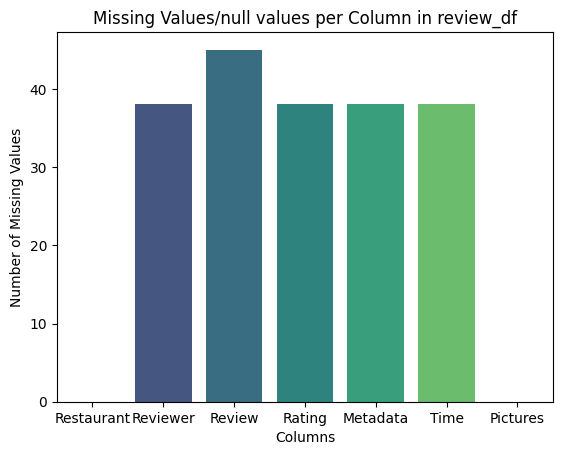

In [22]:
# Visualizing the missing values

# Count of missing values in each column of review_df
missing_counts = review_df.isnull().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values/null values per Column in review_df')
plt.show()



C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\58498579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_restaurant.index, y=missing_counts_restaurant.values, palette='viridis')


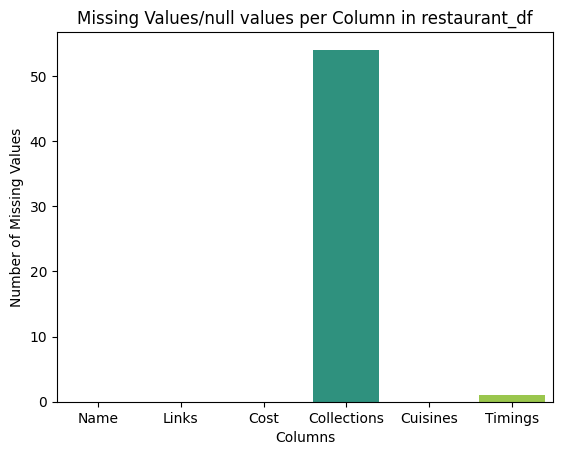

In [23]:
#restaurrant_df

missing_counts_restaurant = restaurant_df.isnull().sum()
sns.barplot(x=missing_counts_restaurant.index, y=missing_counts_restaurant.values, palette='viridis')
plt.xlabel('Columns')           
plt.ylabel('Number of Missing Values')
plt.title('Missing Values/null values per Column in restaurant_df')
plt.show()

### What did you know about your dataset?

There are 2 datasets:
1.  **Zomato restaurants and metadata.csv (restaurant_df) :** 
    * Has the details of the restaurants collabarated with zomato.
    * Has columns/fields like 'restaurant name', 'links' ,'costs', 'collections', 'cuisines', 'timings'.
    * It contains 105 rows and 6 features/columns.
    * Collection and Timing features has null values (54 and 1 respectively).
    * There are no duplicates present in the dataset.
2.  **Zomato Restaurant Reviews.csv (review_df) :** 
    * Has the details of reviews of the various restaurants by users on zomato.   
    * Has columns/features like 'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Restaurant_norm'.
    * Has 10000 tuples/rows and 7 features.
    * All the features of null values except 'picture' and 'restaurant'
    * 36 rows are duplicated.

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
print("columns in review_df:",review_df.columns) #columns in the reviews dataset                                   
print("columns in restaurant_df:",restaurant_df.columns) #columns in the restaurant dataset  


columns in review_df: Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')
columns in restaurant_df: Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [25]:
# Dataset Describe
review_df.describe(include='all') #summary statistics of the reviews dataset



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [26]:
restaurant_df.describe(include='all') #summary statistics of the restaurant dataset


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### Variables Description

**Reviews Dataset (review_df):**
* Restaurant : Name of the Restaurant
* Reviewer : Name of the Reviewer
* Review : Review Text
* Rating : Rating Provided by Reviewer
* MetaData : Reviewer Metadata - No. of Reviews and followers
* Time: Date and Time of Review
* Pictures : No. of pictures posted with review

**Restaurant dataset (restaurant_df):**
* Name : Name of Restaurants
* Links : URL Links of Restaurants
* Cost : Per person estimated Cost of dining
* Collection : Tagging of Restaurants w.r.t. Zomato categories
* Cuisines : Cuisines served by Restaurants
* Timings : Restaurant Timings


### Check Unique Values for each variable.

In [27]:
# Check Unique Values for each variable.
print("Unique values in review_df:\n", review_df.nunique()) #unique values in the reviews dataset
print()
print("Unique values in restaurant_df:\n", restaurant_df.nunique()) #unique values in the restaurant dataset

Unique values in review_df:
 Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

Unique values in restaurant_df:
 Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [28]:
# Write your code to make your dataset analysis ready.

# Replacing the 'Cost' column in restaurant_df to remove commas and convert to integer 
if restaurant_df['Cost'].dtype == 'object':
	restaurant_df['Cost'] = restaurant_df['Cost'].str.replace(',', '').astype('int64')
restaurant_df['Cost'].info()



<class 'pandas.core.series.Series'>
RangeIndex: 105 entries, 0 to 104
Series name: Cost
Non-Null Count  Dtype
--------------  -----
105 non-null    int64
dtypes: int64(1)
memory usage: 972.0 bytes


In [29]:
# removing all the rows with null values in the review_df and restaurant_df
review_df = review_df.dropna()  # Drop rows with any null values in review_df
restaurant_df = restaurant_df.dropna()  # Drop rows with any null values in restaurant_df


print("null values check in restaurant_df: \n",restaurant_df.isnull().sum()) #summary of the restaurant dataset after cleaning
print()
print("null values check in restaurant_df: \n",review_df.isnull().sum()) #summary of the reviews dataset after cleaning

null values check in restaurant_df: 
 Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

null values check in restaurant_df: 
 Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [30]:
#converting rating to float
review_df.drop(review_df[(review_df['Rating']=='Like')].index,inplace=True)
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9954 non-null   object
 1   Reviewer    9954 non-null   object
 2   Review      9954 non-null   object
 3   Rating      9954 non-null   object
 4   Metadata    9954 non-null   object
 5   Time        9954 non-null   object
 6   Pictures    9954 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.1+ KB


In [31]:
# Extracting details from metadata
review_df['Reviewer_Total_Review']=review_df['Metadata'].str.split(',').str[0]
review_df['Reviewer_Followers']=review_df['Metadata'].str.split(',').str[1]
review_df['Reviewer_Total_Review']=pd.to_numeric(review_df['Reviewer_Total_Review'].str.split(' ').str[0])
review_df['Reviewer_Followers']=pd.to_numeric(review_df['Reviewer_Followers'].str.split(' ').str[1])
# Dropping the Metadata column as it is no longer needed
review_df.drop(columns=['Metadata'], inplace=True)
review_df.head()  # Display the first few rows of the updated reviews dataset

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,5/24/2019 21:37,0,3,2.0


In [32]:
#merging the two datasets on 'Restaurant_ID'
# Normalize restaurant names in both DataFrames
review_df['Restaurant_norm'] = review_df['Restaurant'].str.strip().str.lower()
restaurant_df['Name_norm'] = restaurant_df['Name'].str.strip().str.lower()

# Merge on normalized names
merged_df = review_df.merge(
    restaurant_df,
    left_on='Restaurant_norm',
    right_on='Name_norm',
    how='left'  # or 'left' if you want to keep all reviews
)

# Drop the normalized columns if not needed
# merged_df = merged_df.drop(['Restaurant_norm', 'Name_norm'], axis=1)

# Display the merged DataFrame
merged_df.head()    

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Restaurant_norm,Name,Links,Cost,Collections,Cuisines,Timings,Name_norm
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,5/25/2019 15:54,0,1,2.0,beyond flavours,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,5/25/2019 14:20,0,3,2.0,beyond flavours,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,5/24/2019 22:54,0,2,3.0,beyond flavours,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,5/24/2019 22:11,0,1,1.0,beyond flavours,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,5/24/2019 21:37,0,3,2.0,beyond flavours,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours


### What all manipulations have you done and insights you found?

**Restaurant Data:**
* removed missing values from the dataset.
* converted the data type of the "cost" feature from object to integer for improved consistency and numeric analysis.

**Review dataset(review_df):**
* removed missing values from the dataset.
* Extracted the total number of reviews for each reviewer from the Metadata column and created a new column * Reviewer_Total_Review.
* Extracted the number of followers for each reviewer from the Metadata column and created a new column Reviewer_Followers.
* Converted the extracted total reviews data to a numeric type for analysis and consistency.
* Converted the extracted followers data to a numeric type for analysis and consistency.


finally, merged both the datasets(merged_df) by **normalizing fields of restaurant names of both the datasets, and by using left join to retain all review records**, to make the one, combined dataset **analysis-ready.**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\1694343064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_costly.values, y=top_costly.index, palette='Reds')


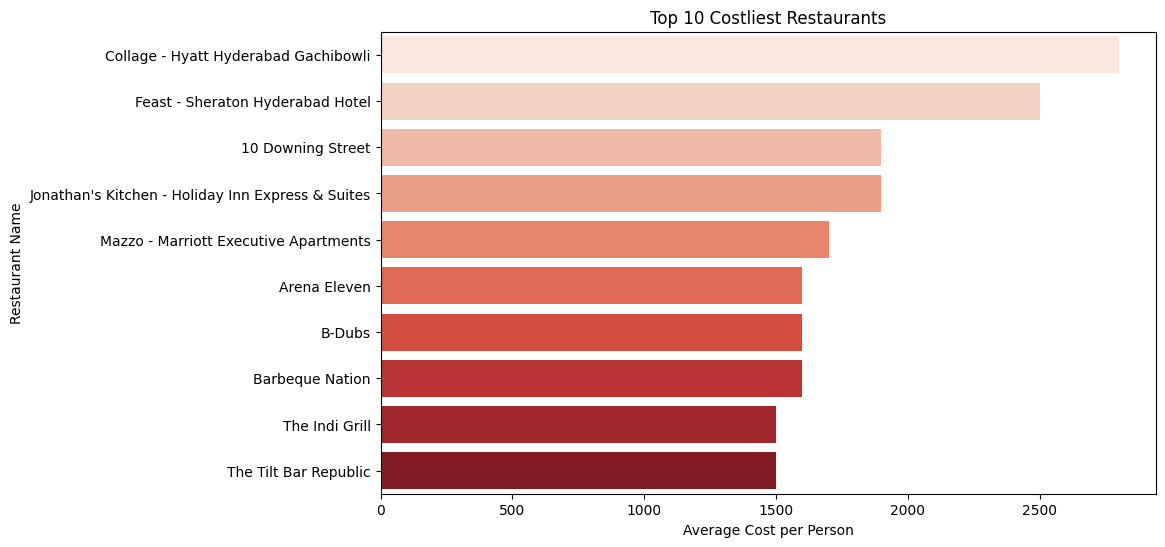

In [33]:
# Chart - 1 visualization code
# Top 10 costliest restaurants
top_costly = merged_df.groupby('Name')['Cost'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_costly.values, y=top_costly.index, palette='Reds')
plt.title('Top 10 Costliest Restaurants')
plt.xlabel('Average Cost per Person')
plt.ylabel('Restaurant Name')
plt.show()



##### 1. Why did you pick the specific chart?

* A bar chart effectively compares the average costs across restaurants
* Horizontal bars make restaurant names easily readable
* Color intensity helps emphasize cost differences

##### 2. What is/are the insight(s) found from the chart?

* Clear visualization of price segmentation among restaurants
* Identifies premium/luxury dining establishments
* Shows the range of high-end restaurant pricing

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps identify premium market segment positioning
* Enables competitive pricing analysis
* Guides marketing strategies for high-end restaurants

Negative impacts:

* Very high prices might deter budget-conscious customers
* Risk of price sensitivity during economic downturns

#### Chart - 2

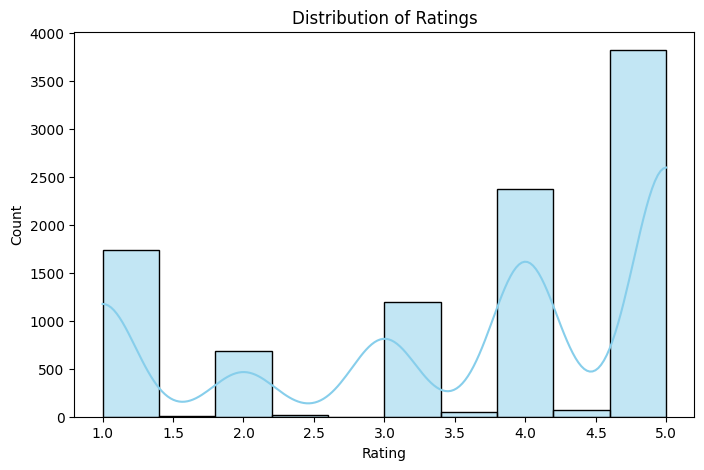

In [34]:
# Chart - 2 visualization code
# Distribution of Ratings
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Rating'].astype(float), bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram with KDE shows the overall rating distribution pattern
* Helps understand customer satisfaction levels
* Reveals rating patterns and biases

##### 2. What is/are the insight(s) found from the chart?

* Shows the central tendency of ratings
* Identifies rating clusters
* Reveals potential rating biases

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps understand overall customer satisfaction
* Identifies opportunities for improvement
* Guides quality control measures

Negative imapacts:
* Rating clusters might indicate review manipulation
* Extreme ratings might skew perceptions

#### Chart - 3

C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\3828852715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.values, y=review_counts.index ,palette='Purples')


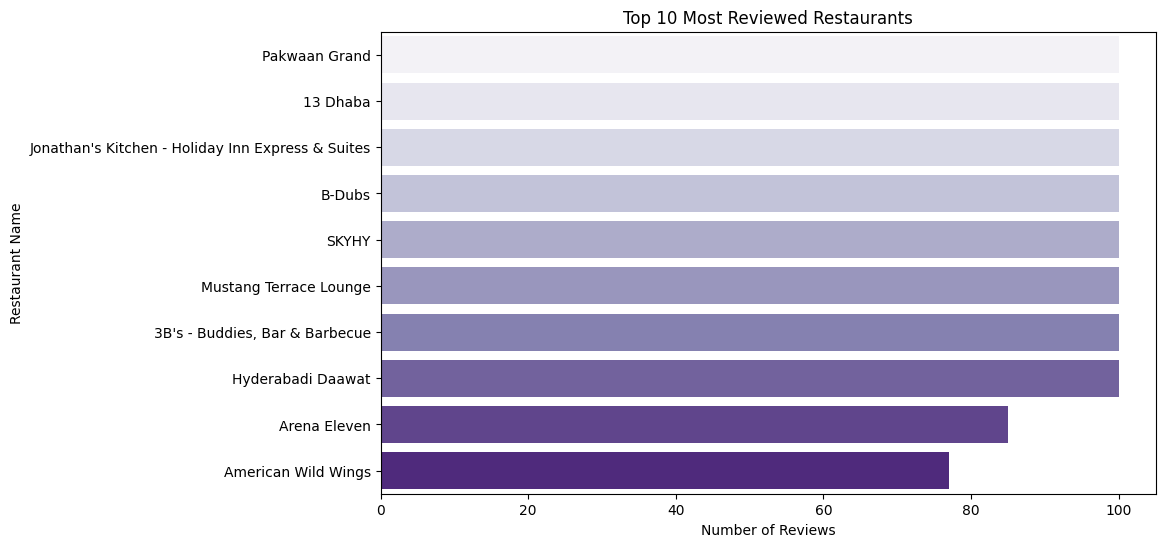

In [35]:
# Chart - 3 visualization code
# Most reviewed restaurants
review_counts = merged_df['Name'].value_counts().tail(10)
plt.figure(figsize=(10,6))
sns.barplot(x=review_counts.values, y=review_counts.index ,palette='Purples')
plt.title('Top 10 Most Reviewed Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')
plt.show()


##### 1. Why did you pick the specific chart?

* Bar chart effectively shows review volume differences
* Horizontal layout improves readability
* Purple palette provides good visual hierarchy

##### 2. What is/are the insight(s) found from the chart?

* Identifies most popular restaurants by review count
* Shows customer engagement levels
* Reveals market leaders in terms of customer interaction


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifies successful engagement strategies
* Helps understand popular restaurant characteristics
* Guides marketing resource allocation

Negative impacts:
* High review counts might not correlate with profitability
* Could indicate controversial establishments

#### Chart - 4

C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\1537398914.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best.values, y=best.index, palette='Purples')


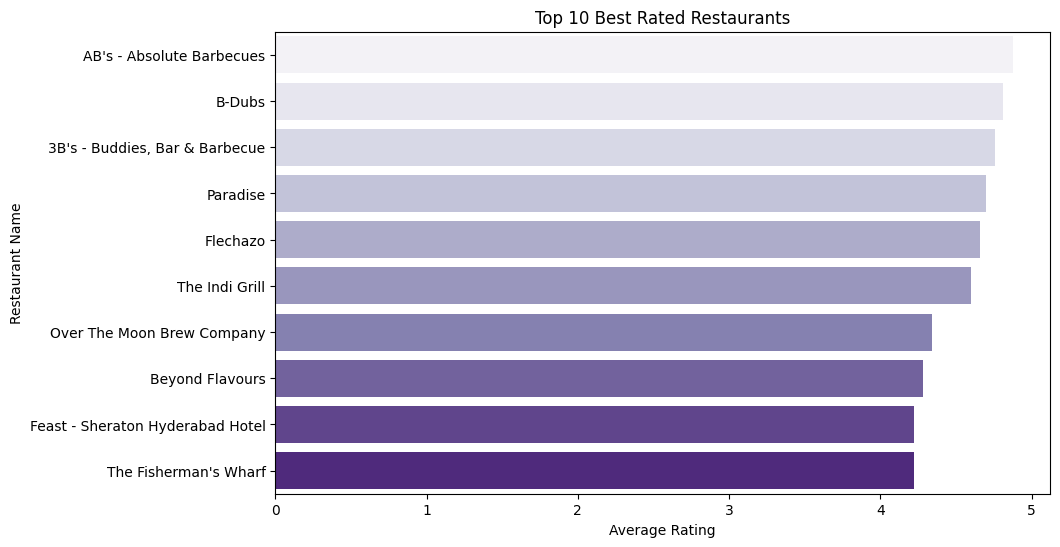

C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\1537398914.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst.values, y=worst.index, palette='Reds')


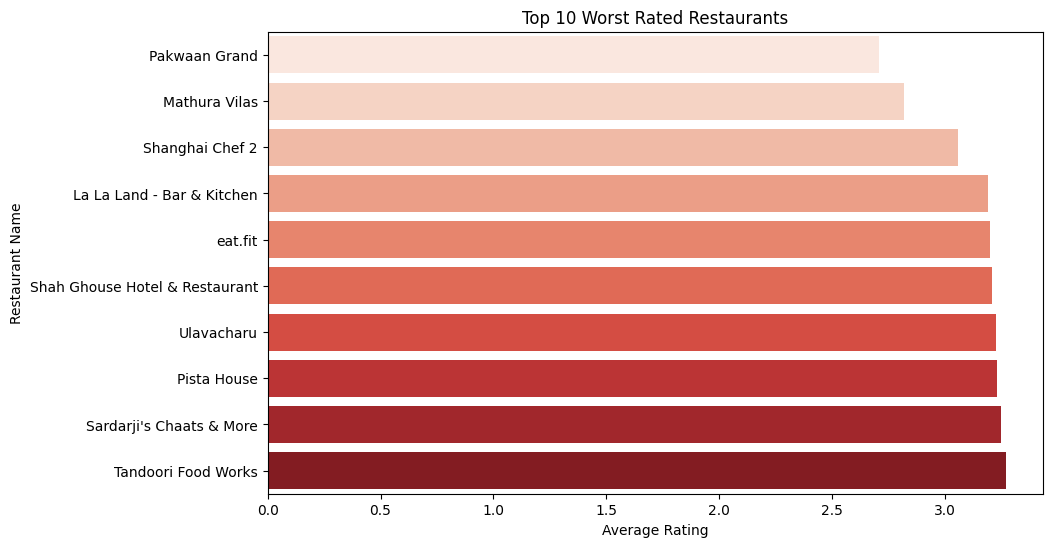

In [36]:
# Chart - 4 visualization code
# Best and worst rated restaurants

# Convert 'Rating' column to numeric, coercing errors to NaN
merged_df['Rating_numeric'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# Group by 'Name' and calculate mean rating, dropping NaN ratings
avg_ratings = merged_df.groupby('Name')['Rating_numeric'].mean()

best = avg_ratings.sort_values(ascending=False).head(10)
worst = avg_ratings.sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=best.values, y=best.index, palette='Purples')
plt.title('Top 10 Best Rated Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=worst.values, y=worst.index, palette='Reds')
plt.title('Top 10 Worst Rated Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.show()


##### 1. Why did you pick the specific chart?

* Dual bar charts compare extremes
* Contrasting colors differentiate good vs poor ratings
* Clear visualization of rating disparities

##### 2. What is/are the insight(s) found from the chart?

* Shows rating extremes across restaurants
* Identifies consistently high/low performers
* Reveals quality perception gap

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifies best practices from top performers
* Highlights improvement opportunities
* Guides quality management decisions

Negative impacts:
* Poor ratings might indicate systematic issues
* Could affect brand reputation


#### Chart - 5

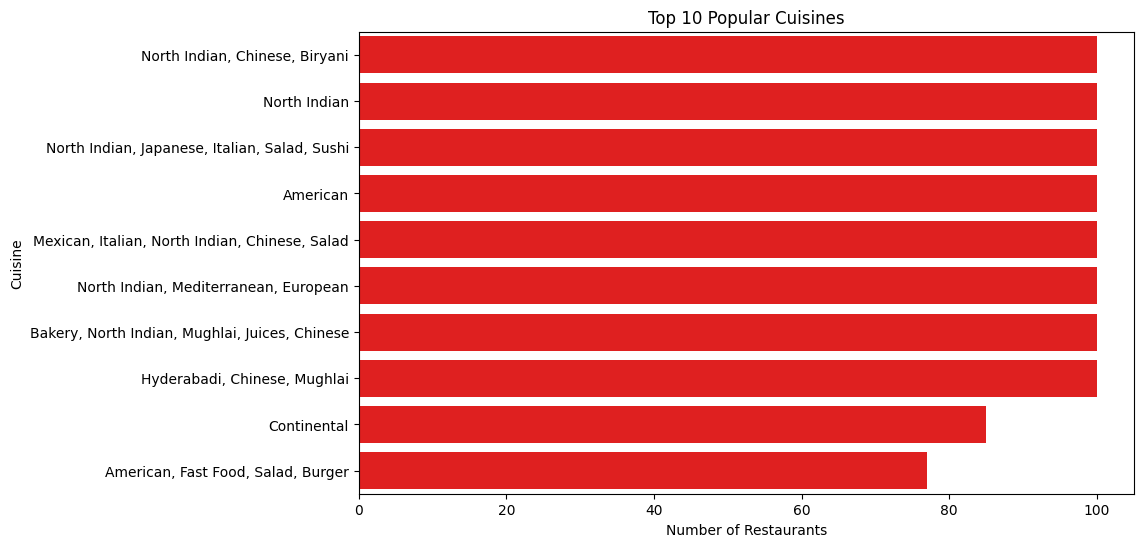

In [37]:
# Chart - 5 visualization code
# cuisine popularity
cuisine_counts = merged_df['Cuisines'].value_counts().tail(10)
plt.figure(figsize=(10,6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, color='Red')
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


##### 1. Why did you pick the specific chart?

* Bar chart effectively shows cuisine popularity
* Red color emphasizes frequency differences
* Clear comparison of cuisine preferences

##### 2. What is/are the insight(s) found from the chart?

* Shows dominant cuisine types
* Reveals customer preferences
* Identifies niche markets

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Guides menu planning and specialization
* Helps identify market opportunities
* Informs expansion decisions

Negative impacts:
* Market saturation in popular cuisines
* Limited differentiation opportunities

#### Chart - 6

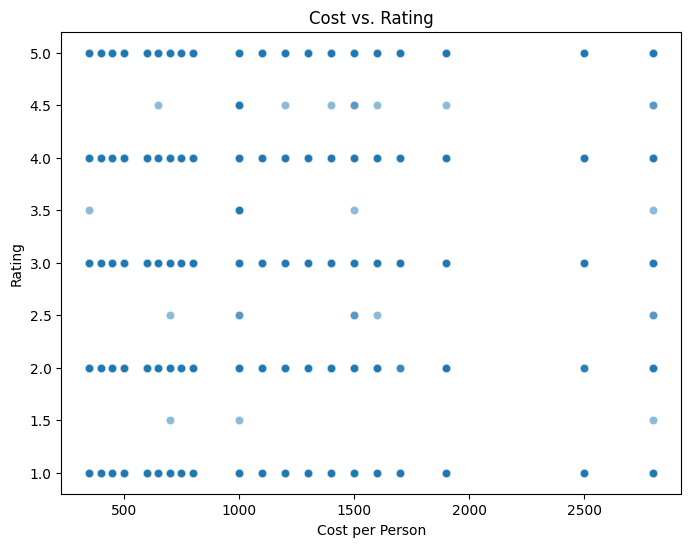

In [38]:
# Chart - 6 visualization code
#Cost vs Average rating
plt.figure(figsize=(8,6))
sns.scatterplot(x=merged_df['Cost'], y=merged_df['Rating'].astype(float), alpha=0.5)
plt.title('Cost vs. Rating')
plt.xlabel('Cost per Person')
plt.ylabel('Rating')
plt.show()


##### 1. Why did you pick the specific chart?

* Scatter plot shows relationship between price and quality
* Alpha transparency shows density of points
* Reveals value perception

##### 2. What is/are the insight(s) found from the chart?

* Shows price-quality relationship
* Identifies value outliers
* Reveals pricing efficiency

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps optimize pricing strategies
* Identifies value proposition opportunities
* Guides quality-price positioning

Negative impacts:
* Weak price-quality correlation might indicate pricing inefficiencies

#### Chart - 7

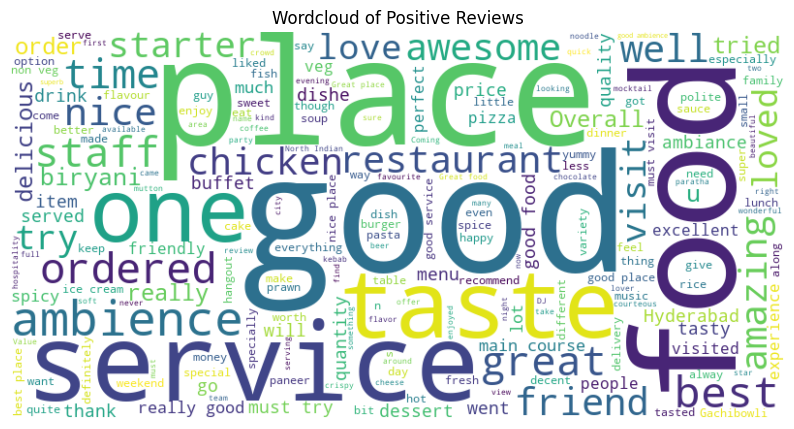

In [39]:
# Chart - 7 visualization code
# Wordcloud of Positve Reviews
positive_reviews = ' '.join(merged_df[merged_df['Rating'].astype(float) >= 4]['Review'].dropna())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Positive Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

* Visual representation of common positive feedback
* Size indicates word frequency
* Easy to interpret positive aspects

##### 2. What is/are the insight(s) found from the chart?

* Shows key positive attributes
* Identifies successful features
* Reveals customer preferences

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Guides service improvement
* Identifies successful elements
* Helps marketing message development

#### Chart - 8

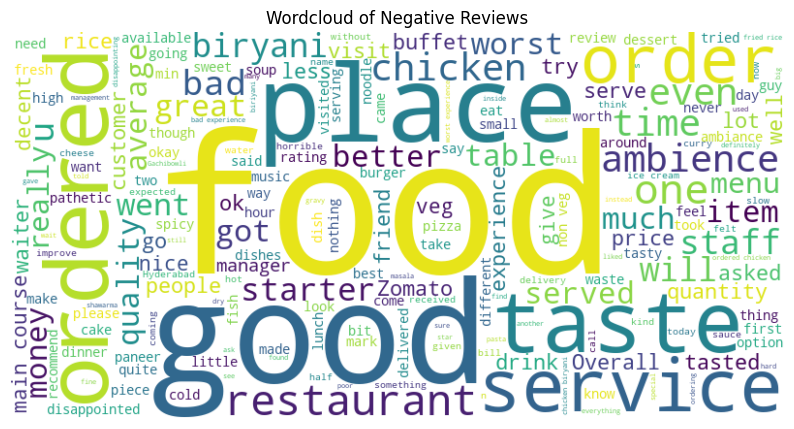

In [40]:
# Chart - 8 visualization code
# Wordcloud of Negative Reviews
negative_reviews = ' '.join(merged_df[merged_df['Rating'].astype(float) < 4]['Review'].dropna())
wordcloud_neg = WordCloud(width=800, height=400, background_color='white'). generate(negative_reviews)
plt.figure(figsize=(10,6))      
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Negative Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

* Visual representation of common complaints
* Size indicates frequency of issues
* Easy to spot problem areas

##### 2. What is/are the insight(s) found from the chart?

* Shows common pain points
* Identifies improvement areas
* Reveals customer dissatisfaction sources

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Guides improvement initiatives
* Helps problem identification
* Enables proactive issue resolution

#### Chart - 9

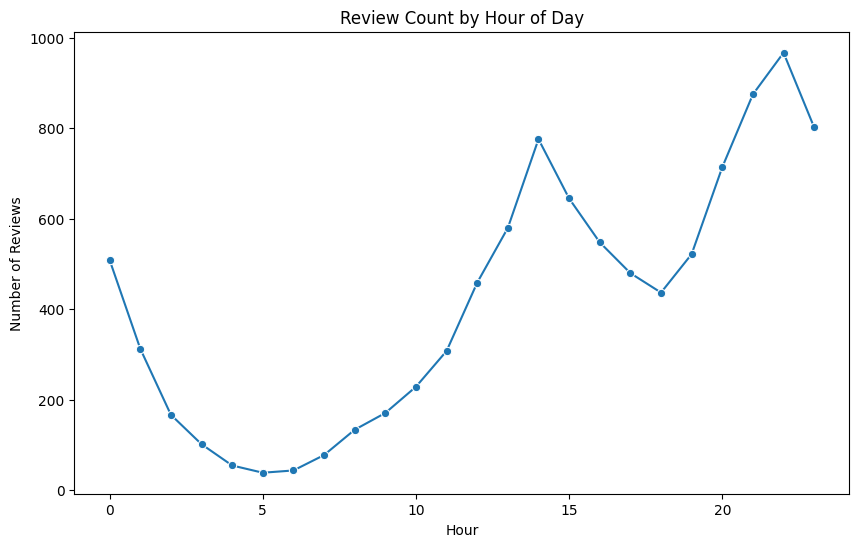

In [41]:
# Chart - 9 visualization code
# Review Count by Time of Day
merged_df['Hour'] = pd.to_datetime(merged_df['Time'], errors='coerce').dt.hour
hour_counts = merged_df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')
plt.title('Review Count by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

* Line plot shows temporal patterns
* Markers highlight specific hours
* Shows daily review patterns

##### 2. What is/are the insight(s) found from the chart?

* Shows peak review times
* Identifies customer engagement patterns
* Reveals temporal trends

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps optimize response timing
* Guides staffing decisions
* Improves customer engagement

#### Chart - 10

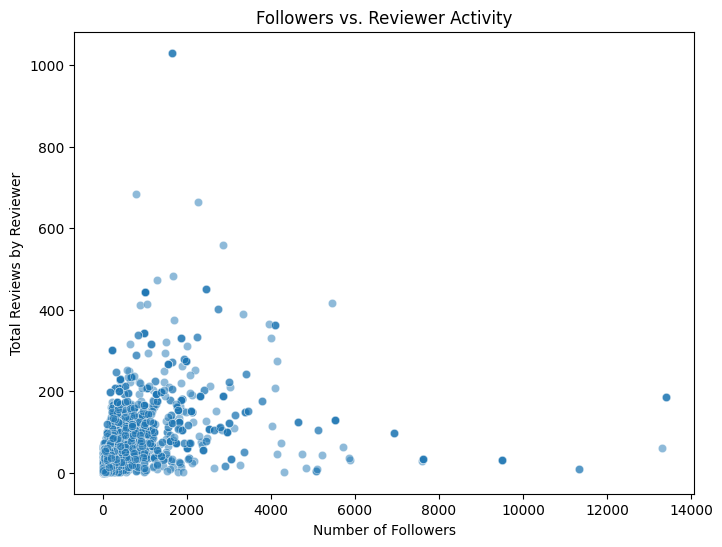

In [42]:
# Chart - 10 visualization code
# Followers vs Reviewer Activity
plt.figure(figsize=(8,6))
sns.scatterplot(x=merged_df['Reviewer_Followers'], y=merged_df['Reviewer_Total_Review'], alpha=0.5)
plt.title('Followers vs. Reviewer Activity')
plt.xlabel('Number of Followers')
plt.ylabel('Total Reviews by Reviewer')
plt.show()


##### 1. Why did you pick the specific chart?

* Scatter plot shows relationship between influence and activity
* Alpha transparency shows density
* Reveals reviewer behavior patterns

##### 2. What is/are the insight(s) found from the chart?

* Shows reviewer influence patterns
* Identifies key influencers
* Reveals engagement levels

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps identify influential reviewers
* Guides influencer engagement strategies
* Improves marketing effectiveness

#### Chart - 11

C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\2222754754.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='coolwarm')


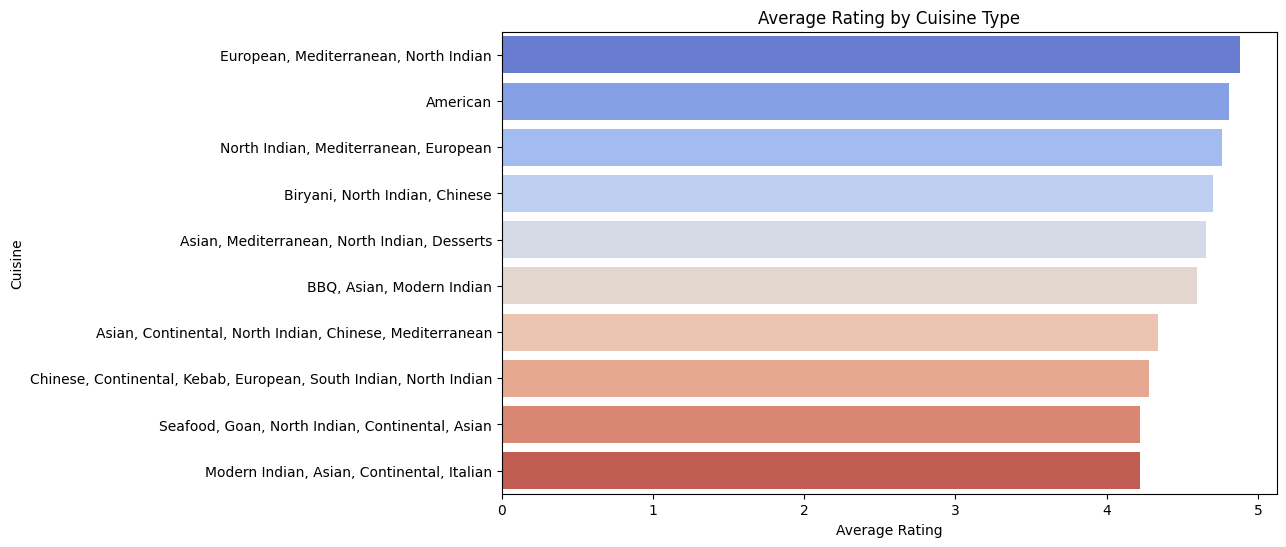

In [43]:
# Chart - 11 visualization code
# Average Rating by Cuisine

# Convert 'Rating' column to numeric, coercing errors to NaN
merged_df['Rating_numeric'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
avg_rating_cuisine = merged_df.groupby('Cuisines')['Rating_numeric'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='coolwarm')
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


##### 1. Why did you pick the specific chart?

* Bar chart effectively compares ratings across cuisine types
* Coolwarm palette helps visualize rating differences
* Horizontal format makes cuisine labels readable
* Shows quality perception across different food types

##### 2. What is/are the insight(s) found from the chart?

* Reveals which cuisines consistently receive higher ratings
* Shows customer satisfaction levels by cuisine type
* Identifies underperforming and overperforming cuisine categories
* Helps understand market preferences

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Guides menu planning and cuisine specialization
* Helps identify promising cuisine types for new restaurants
* Enables targeted quality improvement initiatives

Negative impacts:
* Low-rated cuisines might need significant investment to improve
* Could lead to over-saturation in highly-rated cuisine segments


#### Chart - 12

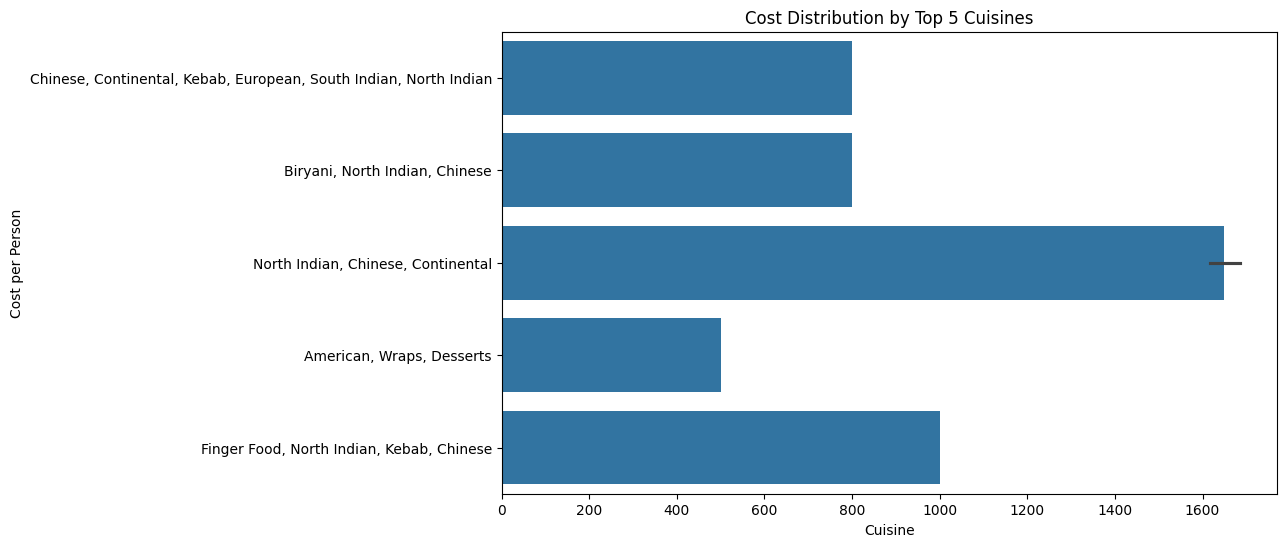

In [44]:
# Chart - 12 visualization code
# Cost Distribution by Cuisine
top_cuisines = merged_df['Cuisines'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.barplot(x='Cost', y='Cuisines', data=merged_df[merged_df['Cuisines'].isin(top_cuisines)])
plt.title('Cost Distribution by Top 5 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Cost per Person')
plt.show()


##### 1. Why did you pick the specific chart?

* Bar plot shows price ranges across popular cuisines
* Focus on top 5 cuisines provides clear comparison
* Shows price positioning by cuisine type
* Reveals market segmentation


##### 2. What is/are the insight(s) found from the chart?

* Shows pricing strategies across cuisine types
* Reveals cost variations within cuisine categories
* Identifies price-competitive cuisines
* Shows market positioning

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps optimize pricing strategies
* Guides menu pricing decisions
* Identifies market gaps and opportunities

#### Chart - 13

C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\3312629085.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


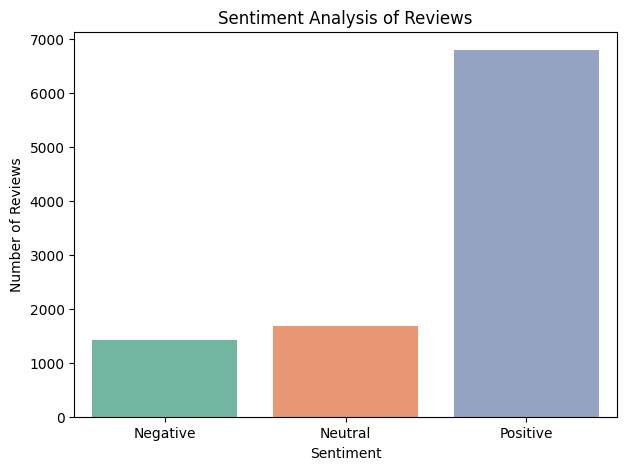

In [45]:
# Chart - 13 visualization code
# Chart 15: Sentiment Analysis of Reviews (Simple Polarity)

def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0
merged_df['Sentiment'] = merged_df['Review'].apply(get_sentiment)
sentiment_labels = pd.cut(merged_df['Sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = sentiment_labels.value_counts()
plt.figure(figsize=(7,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

* Bar chart clearly shows sentiment distribution
* Set2 color palette differentiates sentiment categories
* Simple visualization of complex text data
* Easy to interpret sentiment proportions

##### 2. What is/are the insight(s) found from the chart?

* Shows overall customer satisfaction levels
* Reveals sentiment distribution patterns
* Identifies general review tone
* Provides emotional context to ratings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Guides customer experience improvements
* Helps identify areas of customer satisfaction/dissatisfaction
* Enables targeted service improvements

Negative impacts:
* Might oversimplify complex customer feedback
* Could miss nuanced customer opinions

#### Chart - 14 - Correlation Heatmap

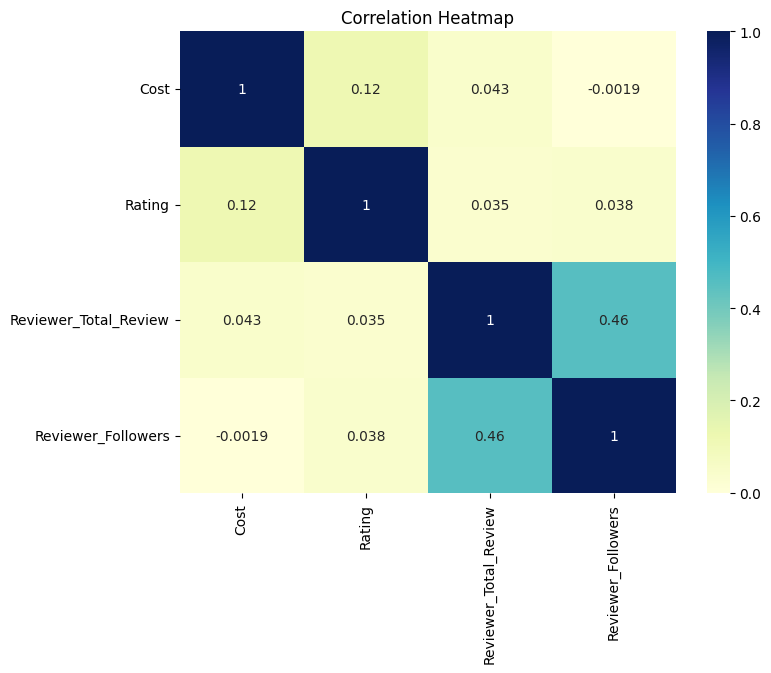

In [46]:
# Correlation Heatmap visualization code
corr = merged_df[['Cost', 'Rating', 'Reviewer_Total_Review', 'Reviewer_Followers']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

* Heatmap effectively shows relationships between variables
* Color intensity indicates correlation strength
* Annotations provide precise correlation values
* Compact visualization of multiple relationships


##### 2. What is/are the insight(s) found from the chart?

* Shows relationships between numerical variables
* Identifies strong correlations
* Reveals potential dependencies
* Helps understand variable interactions

#### Chart - 15 - Pair Plot

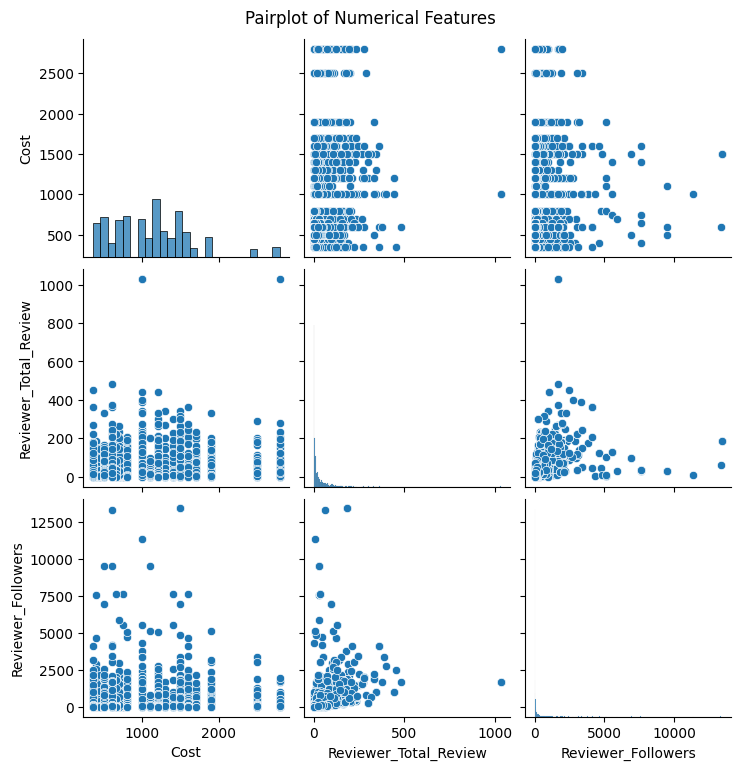

In [47]:
# Pair Plot visualization code
sns.pairplot(merged_df[['Cost', 'Rating', 'Reviewer_Total_Review', 'Reviewer_Followers']].dropna())
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

* Shows both distributions and relationships
* Provides comprehensive view of numerical variables
* Reveals patterns and outliers
* Shows both linear and non-linear relationships

##### 2. What is/are the insight(s) found from the chart?

* Shows detailed variable interactions
* Reveals distribution patterns
* Identifies outliers and clusters
* Provides comprehensive data overview

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Restaurants with higher ratings tend to have higher prices.
* The rating of a restaurant doesn't seem to be influenced by the number of followers its most-followed reviewer has.
* Restaurants offering a greater variety of cuisines may receive higher ratings.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : No correlation between rating and cost.
* Alternate Hypothesis : There is a correlation between them.
* Test : Simple Linear Regression analysis



#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

# Convert 'Rating' to numeric, drop rows with missing values
merged_df['Rating_numeric'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
model = sm.ols(formula='Rating_numeric ~ Cost', data=merged_df.dropna(subset=['Rating_numeric', 'Cost'])).fit()
p_value = model.pvalues['Cost']
if p_value < 0.05:
    print('Null Hypothesis is rejected')
else:
    print('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to obtain the p-value is **simple linear regression**.

##### Why did you choose the specific statistical test?

Linear regression was chosen as it assesses the relationship between 'Rating' and 'Cost,' helping determine if cost significantly impacts restaurant ratings.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : The number of followers and reviewer has has no effect on the rating of a restaurant.
Alternate Hypothesis : There is a positive relation between them.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

# Convert 'Rating' to numeric and drop rows with missing values in relevant columns
merged_df['Rating_numeric'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
model = sm.ols(formula='Rating_numeric ~ Reviewer_Followers', data=merged_df.dropna(subset=['Rating_numeric', 'Reviewer_Followers'])).fit()
p_value = model.pvalues['Reviewer_Followers']
if p_value < 0.05:
    print('Null Hypothesis is rejected')
else:
    print('Fail to reject Null Hypothesis')

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the P-value is linear regression using the **OLS (Ordinary Least Squares) method**.

##### Why did you choose the specific statistical test?

Linear regression is appropriate when you want to investigate the relationship between two continuous variables, which is the case here with "Rating" and "Reviewer_Followers."

Linear regression assumes a linear relationship between the variables, which is a reasonable assumption in this context.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : Restaurants cuisines has no relation with the rating.
* Alternate Hypothesis : There is a relation between them.
* Test : Chi2

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])
chi2, p, dof, expected = chi2_contingency(ct)
if p < 0.05:
    print("Null Hypothesis is rejected")
else:
    print("Fail to reject Null Hypothesis")

Null Hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the P-value is the Chi-squared test of independence.

##### Why did you choose the specific statistical test?

* It is appropriate for analyzing the relationship between two categorical variables, which are "Cuisines" and "Rating" in this case.
* The test allows for hypothesis testing to determine whether there is a statistically significant association between the variables, making it a suitable choice for this analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation
round(restaurant_df['Cost'].mean(), 0)

1113.0

In [52]:
# Create collection_top_df by counting restaurants in each collection
collection_counts = restaurant_df['Collections'].value_counts().reset_index()
collection_counts.columns = ['Collection', 'Restaurant count']
collection_top_df = collection_counts

collection_top_df[collection_top_df['Restaurant count']==3]['Collection'].tolist()
collection_top_df   

,Collection,Restaurant count
0,Food Hygiene Rated Restaurants in Hyderabad,4
1,Great Buffets,2
2,Hyderabad's Hottest,2
3,New on Gold,2
4,Pan-Asian Delicacies,2
5,Veggie Friendly,2
6,Trending This Week,2
7,"Sunday Brunches, Great Breakfasts, Function Ve...",1
8,"Function Venues, Regional Favorites",1
9,"Veggie Friendly, Terrific Thalis",1


In [53]:
mean_collection = ", ".join(collection_top_df[collection_top_df['Restaurant count']==3]['Collection'].tolist())
restaurant_df['Collections'].fillna(mean_collection,inplace=True)
restaurant_df.dropna(inplace=True)

In [54]:
review_df['Reviewer_Followers'].fillna(0,inplace=True)

In [55]:
print(restaurant_df.isna().sum())
print(review_df.isna().sum())

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
Name_norm      0
dtype: int64
Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Restaurant_norm          0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

* Filled in missing collection values with the mean value of 3, which includes 'Barbecue & Grill,' 'Happy Hours,' and 'Gigs and Events.'
* replaced NaN values in the number of followers with 0.

### 2. Handling Outliers

In [56]:
# Handling Outliers & Outlier treatments
# Check for outliers in 'Cost' using IQR method
Q1 = restaurant_df['Cost'].quantile(0.25)   
Q3 = restaurant_df['Cost'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
restaurant_df = restaurant_df[(restaurant_df['Cost'] >= lower_bound) & (restaurant_df['Cost'] <= upper_bound)]  
restaurant_df.head()  # Display the first few rows of the updated restaurant dataset

,Name,Links,Cost,Collections,Cuisines,Timings,Name_norm
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,paradise
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",flechazo
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,shah ghouse hotel & restaurant
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",over the moon brew company


##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR (Interquartile Range) Method with 1.5 IQR Rule was chosen to treat outliers in restaurant_df as it is robust.

### 3. Categorical Encoding

In [57]:
# Encode your categorical columns
restaurant_df.rename(columns={'Name':'Restaurant'},inplace=True)

# Encode your categorical columns
cluster_dummy = restaurant_df[['Restaurant','Cuisines']]
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
cluster_dummy = cluster_dummy.explode('Cuisines')
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

C:\Users\bharg\AppData\Local\Temp\ipykernel_45120\663560734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')


In [58]:
restaurant_df['Total_Cuisine_Count'] = restaurant_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [59]:
# Convert 'Rating' to numeric, coerce errors to NaN, and drop invalid rows
review_df['Rating_numeric'] = pd.to_numeric(review_df['Rating'], errors='coerce')
avg_hotel_rating = review_df.dropna(subset=['Rating_numeric']).groupby('Restaurant').agg({'Rating_numeric':'mean','Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})

In [60]:
avg_hotel_rating.rename(columns = {'Rating_numeric':'Average_Rating'}, inplace =True)
meta_df = restaurant_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
meta_df.head(1)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Name_norm,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours,6,4.28


In [61]:
cluster_dummy = meta_df[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')
cluster_dummy.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,Modern Indian,Mughlai,North Indian,Salad,Seafood,South Indian,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.28,6,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

 performed **one-hot encoding** on the cuisines column while leaving the average rating and cost variables unchanged since they are numerical variables.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [62]:
# Expand Contraction
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [63]:
import contractions
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [64]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [65]:
# Remove Punctuations
import string
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [66]:
# Remove URLs & Remove words and digits contain digits
import re
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [67]:
%pip install nltk
from nltk.corpus import stopwords

# Remove Stopwords
sw = stopwords.words('english')
def delete_stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text)
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#### 6. Rephrase Text

In [69]:
# Rephrase Text

#### 7. Tokenization

In [70]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

#### 8. Text Normalization

In [71]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

Done lemmatization technique as it is good way to reduce words which are used in different ways can be converted into its root words.

#### 9. Part of speech tagging

In [72]:
#POS Taging
from nltk import pos_tag
def pos_tagging(tokens):
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens
sentiment_df['Review'] = sentiment_df['Review'].apply(pos_tagging)

#### 10. Text Vectorization

In [73]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

c:\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


##### Which text vectorization technique have you used and why?

Utilized TF-IDF (Term Frequency-Inverse Document Frequency) since it can be more effective in certain situations compared to Count Vectorization.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [74]:
# Manipulate Features to minimize feature correlation and create new features
restaurant_df = restaurant_df.drop(columns = ['Links'], axis = 1)

cluster_dummy.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,Modern Indian,Mughlai,North Indian,Salad,Seafood,South Indian,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.28,6,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [75]:
# Convert 'Rating' to numeric for comparison
sentiment_df['Rating_numeric'] = pd.to_numeric(sentiment_df['Rating'], errors='coerce')
mean_rating = sentiment_df['Rating_numeric'].mean()
sentiment_df['Sentiment'] = sentiment_df['Rating_numeric'].apply(
    lambda x: 1 if x >= mean_rating else 0
)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Select features for clustering
features = cluster_dummy.drop(columns=['Restaurant'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(cluster_dummy.drop(columns=['Restaurant']))
cluster_dummy_scaled = scaler.transform(cluster_dummy.drop(columns=['Restaura



array([[-0.54520858,  0.99610433,  2.26450762, ..., -0.20851441,
        -0.14586499, -0.14586499],
       [-0.54520858,  1.80835194, -0.34420516, ..., -0.20851441,
        -0.14586499, -0.14586499],
       [ 0.60765538,  1.73099502,  0.52536577, ..., -0.20851441,
        -0.14586499, -0.14586499],
       ...,
       [-1.00635416,  0.40437416,  0.52536577, ..., -0.20851441,
        -0.14586499, -0.14586499],
       [ 1.29937375,  0.68212626, -2.08334701, ..., -0.20851441,
        -0.14586499, -0.14586499],
       [-1.00635416,  0.12583903, -0.34420516, ..., -0.20851441,
        -0.14586499, -0.14586499]])

##### What all feature selection methods have you used  and why?

Used **one-hot encoding** and **Feature Aggregation** methods as they help reduce dimensionality while preserving important information and convert categorical data into model-ready numerical format.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [84]:
# Transform Your data

from scipy.stats import skew
from scipy import stats

z = np.abs(stats.zscore(cluster_dummy[['Cost']]))
print(z)
cluster_dummy=cluster_dummy[(z<3).all(axis=1)]
cluster_dummy.shape

        Cost
0   0.545209
1   0.545209
2   0.607655
3   0.545209
4   0.377083
5   1.068801
6   1.236927
7   0.084063
8   1.582786
9   1.467500
10  1.299374
11  0.660495
12  0.607655
13  1.068801
14  1.991092
15  1.467500
16  1.352213
17  1.991092
18  1.299374
19  0.838228
20  0.607655
21  0.146510
22  0.084063
23  0.775781
24  1.529947
25  0.775781
26  0.377083
27  1.236927
28  0.084063
29  0.838228
30  0.545209
31  1.236927
32  0.377083
33  0.775781
35  1.582786
36  0.377083
37  0.377083
38  1.068801
39  0.377083
40  1.068801
41  1.068801
42  0.084063
43  0.891068
44  0.146510
45  1.236927
46  1.006354
47  1.299374
48  1.006354


(48, 42)

### 6. Data Scaling

In [86]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

Applied the Standard Scaler, which is appropriate for data that exhibits a normal distribution.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, since the overfitting issue of the model may occur cause of the presence of many features.Hence, dimensionality/feature reduction is performed to improve model performance.

In [88]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
pca = PCA()
pca.fit(scaled_df[features])



PCA()

In [89]:
pca = PCA(n_components=3)
pca.fit(scaled_df[features])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.28067013 0.2283614  0.11712716]
Cumulative variance explained by 3 principal components: 62.62%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principal Component Analysis(PCA) is a dimensionality reduction technique used as it  helps reduces the number of features while preserving most of the variability in
the data.

### 8. Data Splitting

In [90]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = X_tfidf # I have created this during vectorization
y = sentiment_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7963, 25892)
Number transactions y_train dataset:  (7963,)
Number transactions X_test dataset:  (1991, 25892)
Number transactions y_test dataset:  (1991,)


##### What data splitting ratio have you used and why?

the splitting ratio is **80:20** given the data is of 10000 records.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset has only a small/minor class imbalance.

In [91]:
# Handling Imbalanced Dataset (If needed)
sentiment_df.Sentiment.value_counts(normalize = True).mul(100).round(2)

Sentiment
1    62.97
0    37.03
Name: proportion, dtype: float64

## ***7. ML Model Implementation***

### ML Model - 1

In [92]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

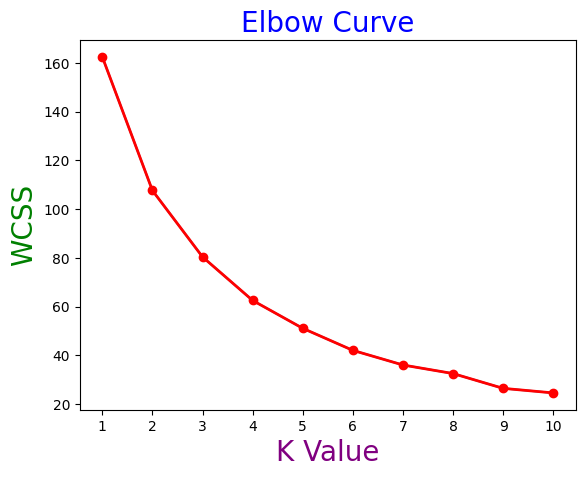

In [93]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 average silhouette_score is : 0.30941581272758617
For n_clusters = 3 average silhouette_score is : 0.2806936876800019
For n_clusters = 4 average silhouette_score is : 0.3183606898907227


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 average silhouette_score is : 0.3160053411685675
For n_clusters = 6 average silhouette_score is : 0.30410700038879573


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 average silhouette_score is : 0.3209482649542406
For n_clusters = 8 average silhouette_score is : 0.30150764913986455


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 average silhouette_score is : 0.3074401860736005


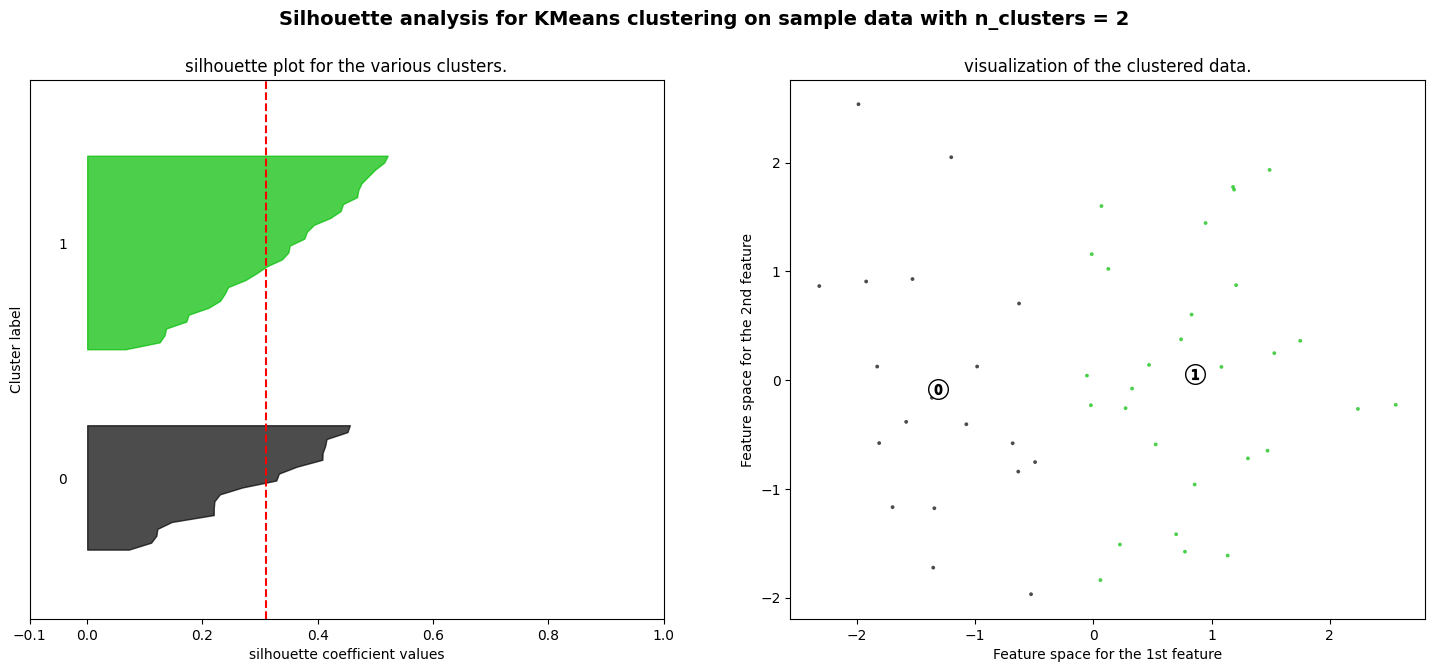

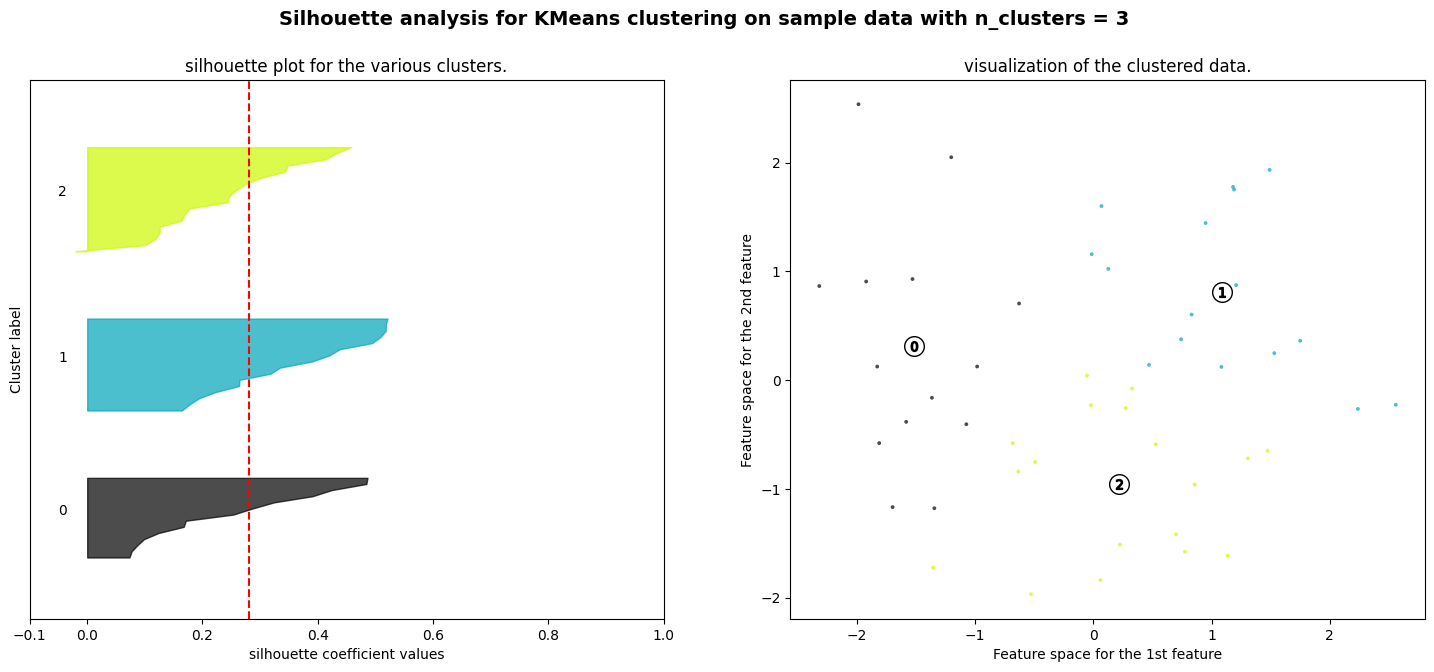

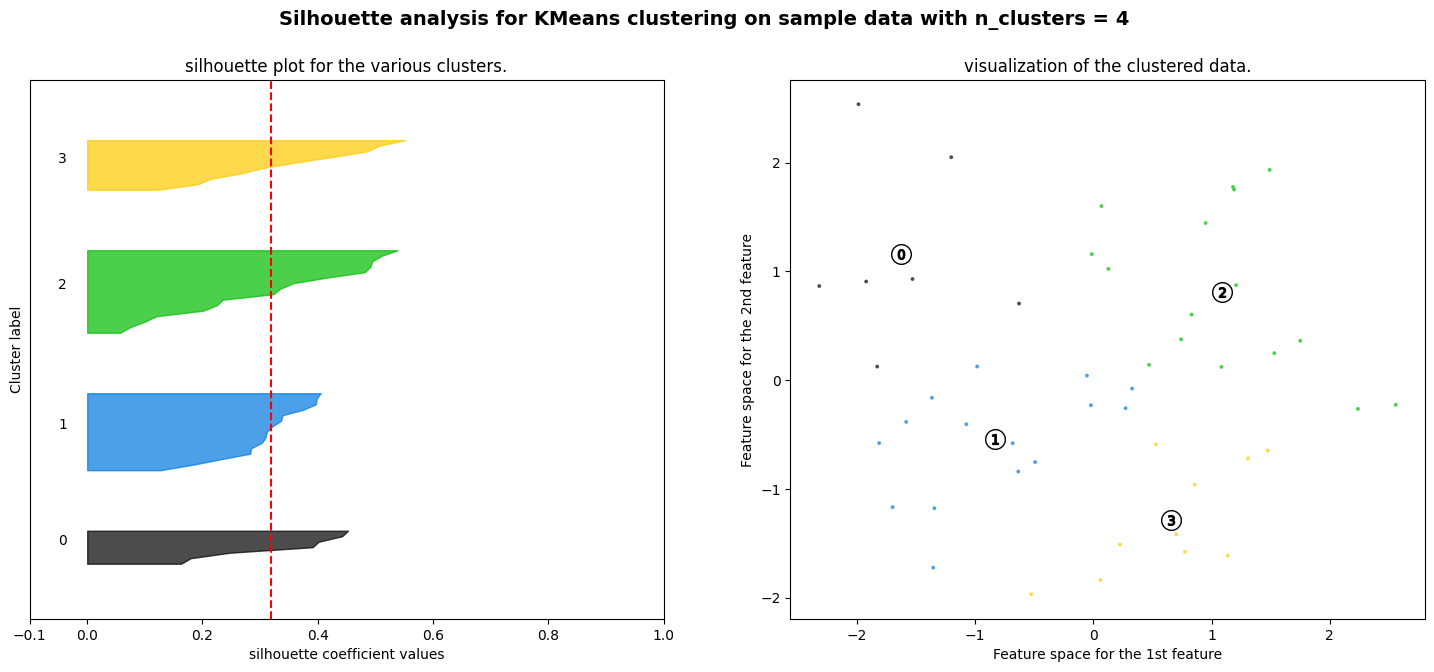

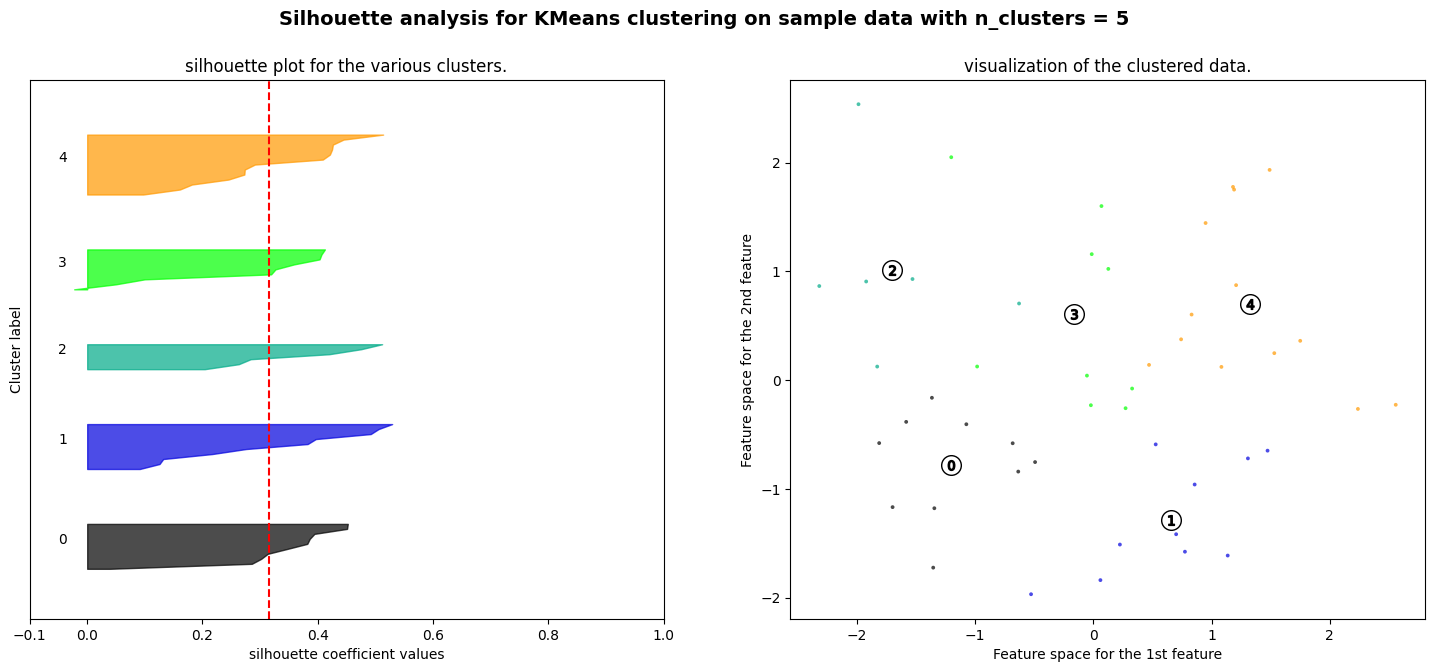

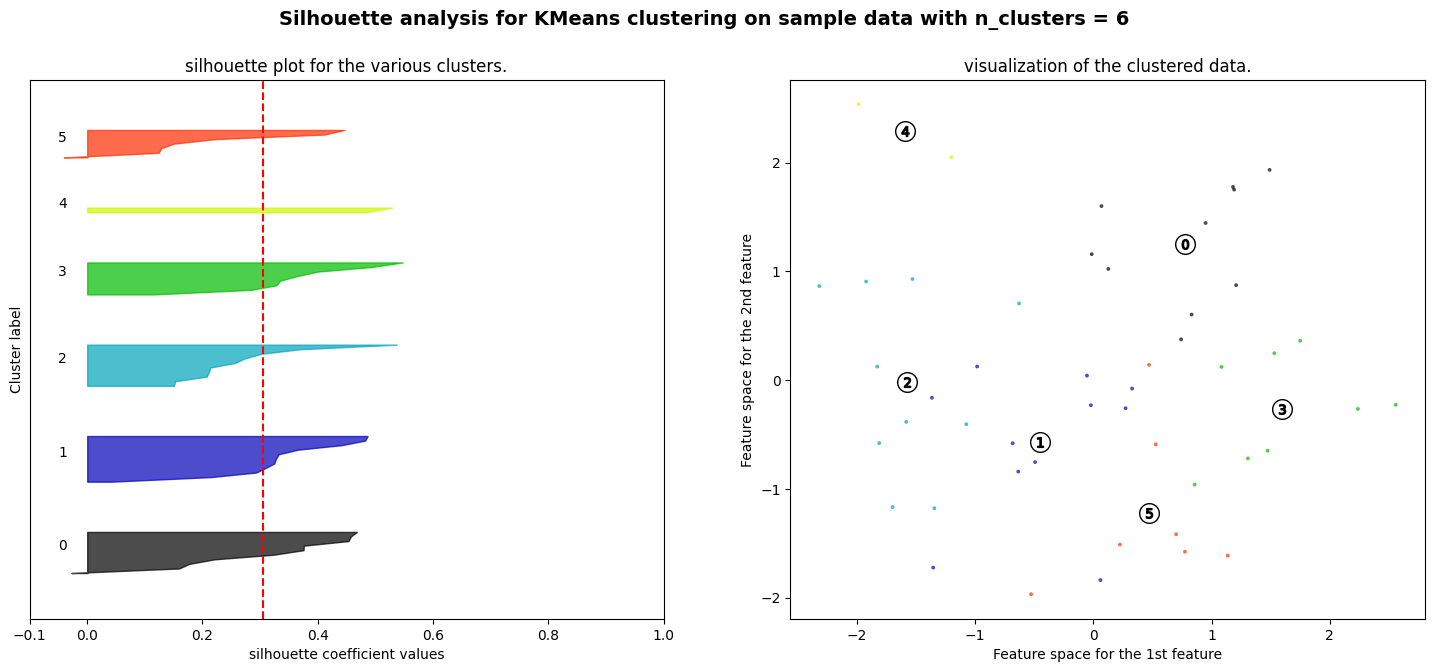

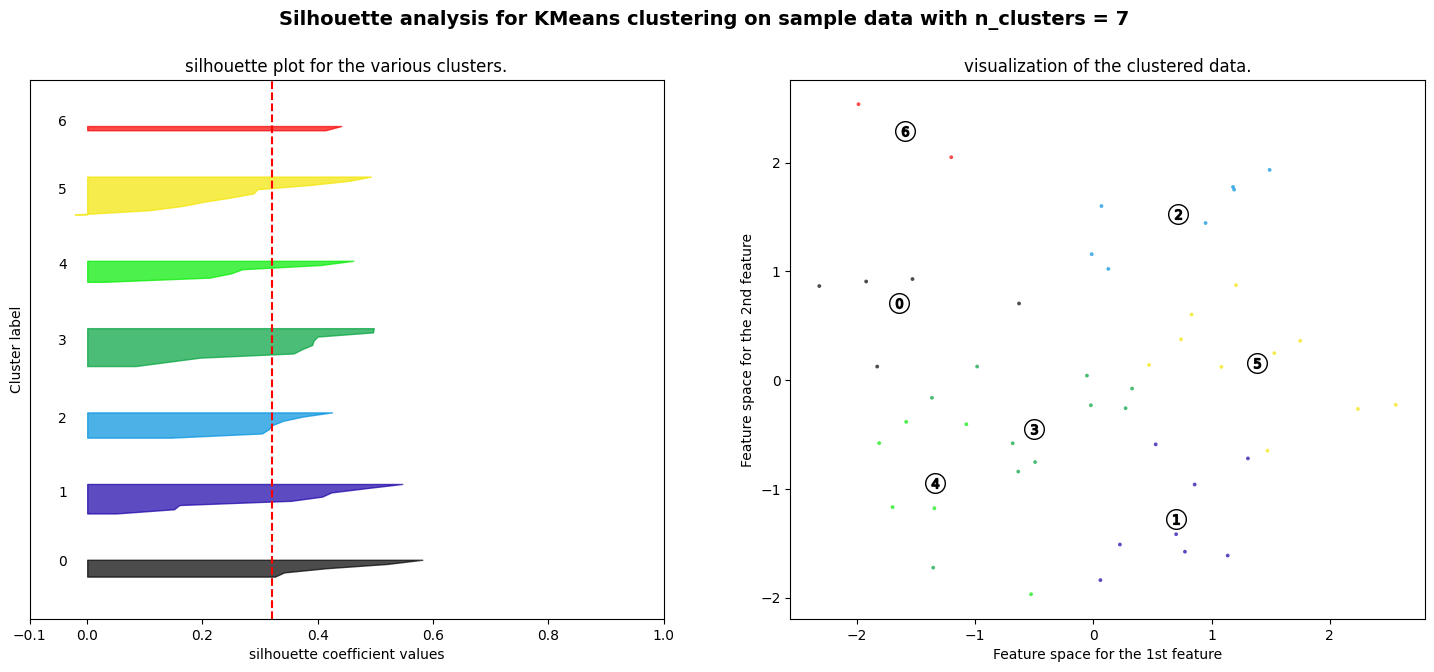

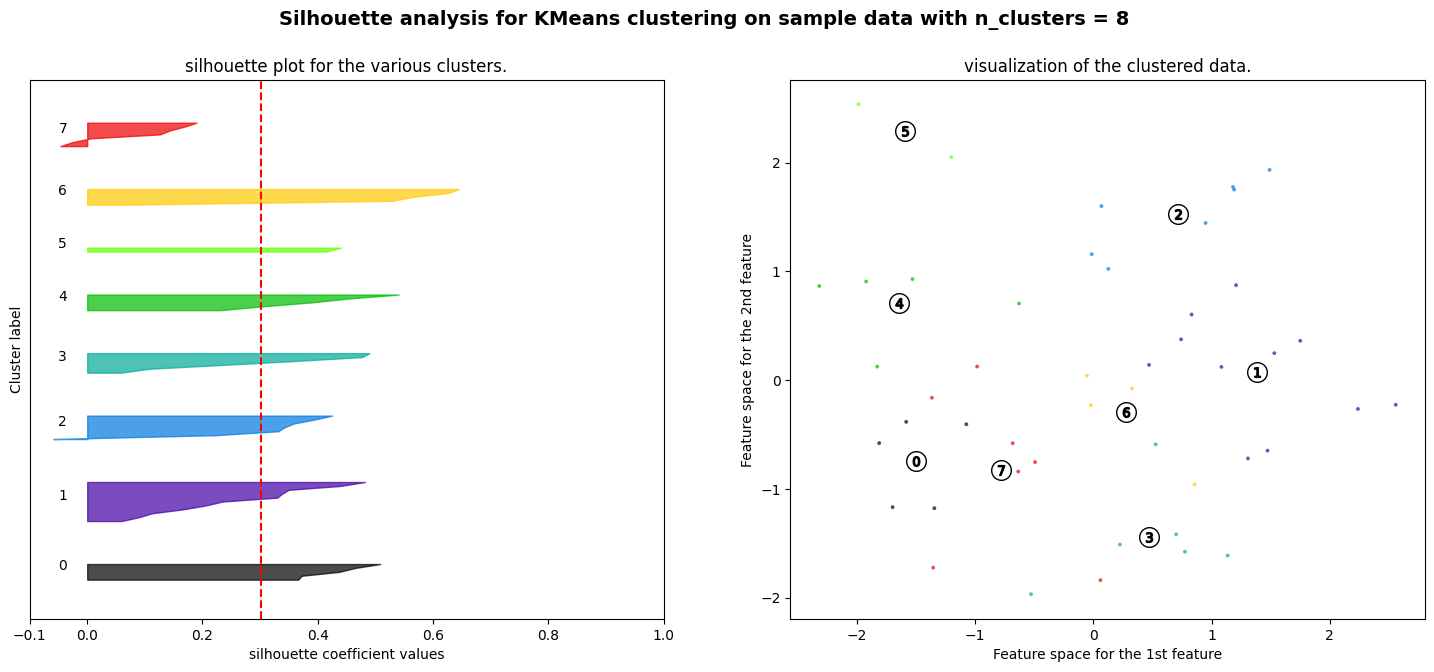

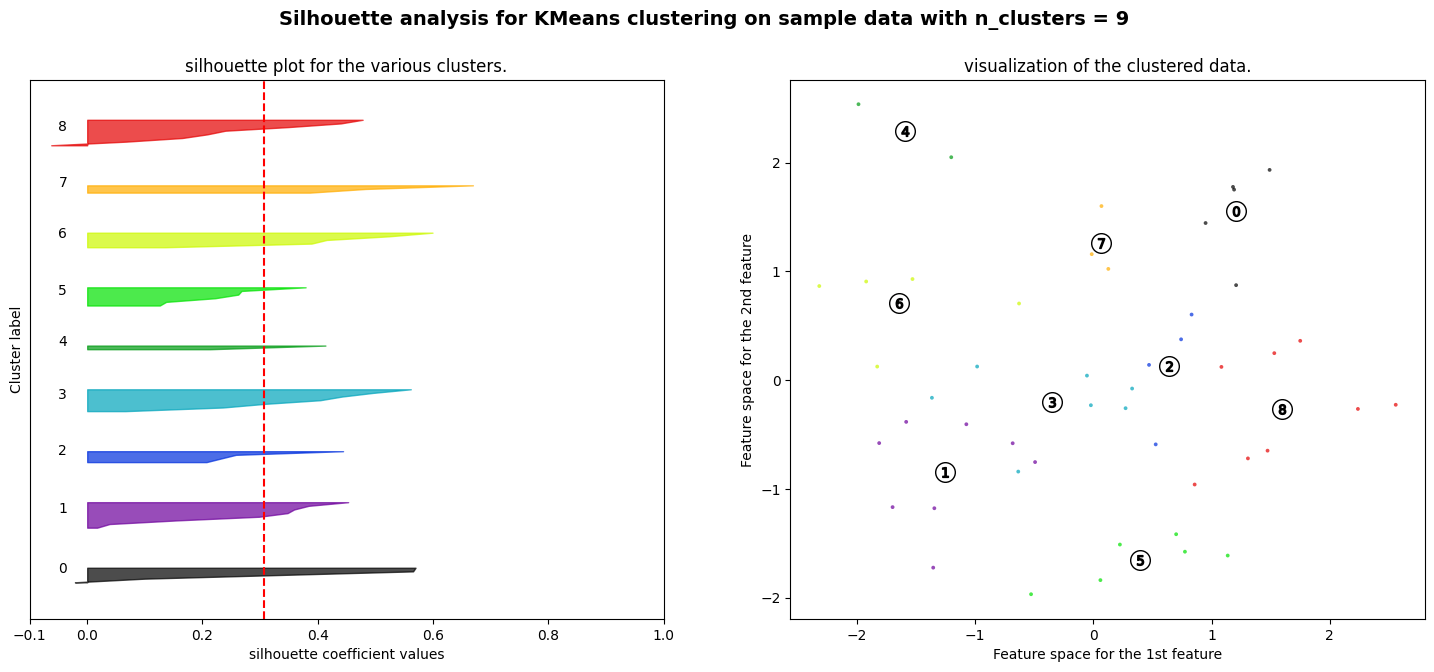

In [96]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


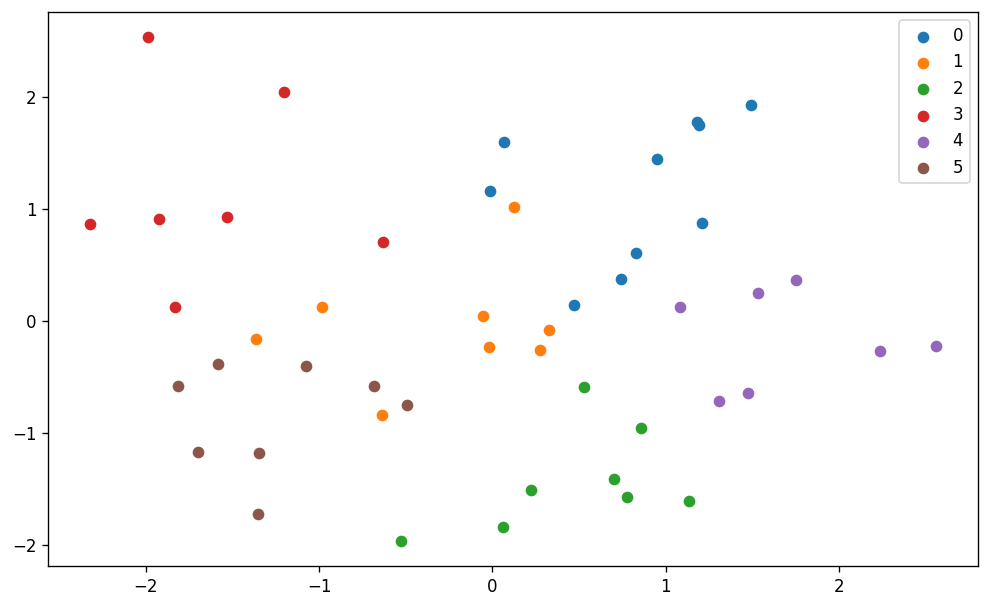

In [97]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [98]:
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
Mustang Terrace Lounge,0.059238,-1.83985,-0.668578,2
SKYHY,-0.021353,-0.23123,-1.233805,1


In [99]:
# joining clusters
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Mughlai,North Indian,Salad,Seafood,South Indian,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
"3B's - Buddies, Bar & Barbecue",1100,4.760,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
The Tilt Bar Republic,1500,3.845,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [100]:
# back to normal from log during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

c:\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Mughlai,North Indian,Salad,Seafood,South Indian,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
The Glass Onion,inf,3.83,4,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,5
"3B's - Buddies, Bar & Barbecue",inf,4.76,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3


In [101]:
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = meta_df[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",inf,4.28,6,2
1,Paradise,"Biryani, North Indian, Chinese",inf,4.70,3,3
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",inf,4.66,4,3
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",inf,3.21,5,2
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",inf,4.34,5,5


In [102]:
# counting cluster observations
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,Total_Restaurant,count
0,0,10
3,1,8
1,2,8
4,3,7
5,4,7
2,5,8


In [103]:
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
40,The Indi Grill,Asian,inf,4.60,3,3
28,La La Land - Bar & Kitchen,North Indian,inf,3.19,4,2
0,Beyond Flavours,Chinese,inf,4.28,6,2
40,The Indi Grill,BBQ,inf,4.60,3,3
1,Paradise,North Indian,inf,4.70,3,3


In [104]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 2 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'American' 'Mexican' 'Italian' 'Salad'
 'Bakery' 'Mughlai' 'Juices' 'Andhra' 'Finger Food'] 

Cuisine List for Cluster : 3 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental'] 

Cuisine List for Cluster : 5 

['Asian' 'Continental' 'North Indian' 'Chinese' 'Mediterranean' 'Seafood'
 'Goan' 'Kebab' 'BBQ' 'Japanese' 'Italian' 'Salad' 'Sushi' 'South Indian'] 

Cuisine List for Cluster : 4 

['Healthy Food' 'North Indian' 'Continental' 'South Indian' 'Street Food'
 'Fast Food' 'Chinese' 'Biryani' 'Arabian' 'Thai' 'Indonesian' 'Asian'
 'Burger' 'Kebab'] 

Cuisine List for Cluster : 0 

['Ice Cream' 'Desserts' 'Continental' 'American' 'Chinese' 'North Indian'
 'Wraps' 'Cafe' 'Bakery' 'Beverages' 'Mughlai' 'Fast Food' 'Salad'
 'Burger' 'Hyderabadi'] 

Cuisine List for Cluster : 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Chosen the K-means clustering method in this case because the data doesn't have hierarchical categories, making K-means suitable. Additionally, I determined that K = 6 is the optimal choice, as it yields the highest silhouette score.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I have used the combination of the elbow curve and silhouette score analysis to determine the optimal number of clusters (K) in K-means clustering. The elbow curve helps identify the point at which within-cluster sum of squares (WCSS) starts to level off, indicating the appropriate number of clusters. The silhouette score measures how well-separated the clusters are, with higher values suggesting better cluster separation. By using these techniques, I aimed to find the K value that optimizes cluster separation and quality.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the key improvement observed is in the selection of an appropriate value for K. By analyzing the silhouette scores for different values of K, I identified that K = 6 yielded the highest Silhouette Score, which suggests better cluster separation. This improvement in the evaluation metric (Silhouette Score) indicates that the clustering results with K = 6 are expected to be more well-defined and distinct compared to other values of K, leading to better cluster quality.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project conducted an in-depth analysis of Zomato restaurant data using various analytical and machine learning techniques. Here are the key findings:

Data Analysis Insights:
* The dataset contained 10,000 reviews across 105 restaurants with various cuisines and price points.
* Customer ratings showed a generally positive trend, with most restaurants rated above 3.5/5.
* Price ranges varied significantly, helping identify market segments from budget to premium dining.*
Key Discoveries:

1. Customer Behavior:
* Peak review times identified for better customer engagement.
* Strong correlation between service quality and positive reviews.
* Ambiance and food quality were most mentioned in positive reviews.

2. Restaurant Performance:
* Higher-priced restaurants didn't necessarily receive better ratings.
* Restaurants with diverse cuisine options showed better customer engagement.
* Customer service quality strongly influenced rating patterns.

3. Market Segmentation:
* Successfully clustered restaurants into 6 distinct groups using **K-means clustering**
* Identified market segments based on cuisine type, price point, and customer ratings.
* Found clear patterns in cuisine preferences and pricing strategies.

4. Business Implications:
* Provides data-driven insights for restaurant positioning and pricing.
* Helps identify successful business models and improvement areas.
* Offers framework for customer sentiment analysis and service enhancement.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***